# Exploring Decision Tree Algorithm

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to see oir entire data set
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [5]:
# reading data
data=pd.read_csv('Iris.csv')
print('Data has been loaded...')

Data has been loaded...


In [6]:
df=data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Since 'Id' column has no significance in our model building so we will drop that

In [7]:
df.drop(['Id'], axis=1, inplace=True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df['Species'].value_counts('Normalize=1')

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

Since, our dataset is balanced so we will take care of accuracy score

In [12]:
x=df.drop('Species', axis=1)
y=df['Species']

### Splitting data for train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=101)

In [19]:
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (120, 4)
Shape of x_test : (30, 4)
Shape of y_train : (120,)
Shape of y_test : (30,)


## Creating Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

### 1. Using gini impurity criteria

In [35]:
dtc=DecisionTreeClassifier(criterion='gini')

In [52]:
dtc.fit(x_train,y_train)
print('Training Done....')

Training Done....


In [37]:
prediction=dtc.predict(x_test)

### Evaluation metrices

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [43]:
confusion_matrix(y_test, prediction)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

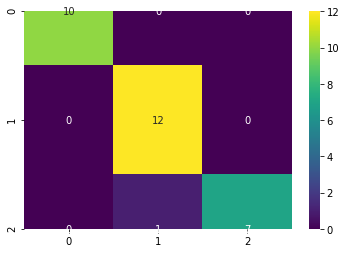

In [69]:
sns.heatmap(confusion_matrix(y_test, prediction), cmap='viridis', annot=True)

In [47]:
print(f'Accuracy of decision tree classifier using Gini Impurity criterion : {np.round(accuracy_score(y_test, prediction)*100,2)}%')

Accuracy of decision tree classifier using Gini Impurity criterion : 96.67%


### Using entropy criterion

In [50]:
DTC=DecisionTreeClassifier(criterion='entropy')

In [51]:
DTC.fit(x_train,y_train)
print('Training Done....')

Training Done....


In [53]:
pred=DTC.predict(x_test)

### Evaluation Metrices

In [54]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [55]:
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

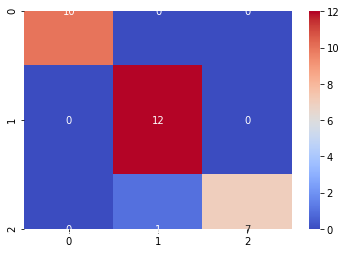

In [70]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='coolwarm', annot=True)

In [57]:
print(f'Accuracy of our Decision Tree Classifier using Entropy criterion : {np.round(accuracy_score(y_test, pred)*100,2)}%')

Accuracy of our Decision Tree Classifier using Entropy criterion : 96.67%


Since both 'Gini Impurity' and 'Information Gain(Entropy)' are giving same accuracy so we will prefer gini impurity as it's fast and has less computation.